Using the groupby and concat function in pandas, how do u analyze the sales data and store information data to address the following aspects
i) calculate the total revenue generated by each product category across all stores

ii)determine the avg daily sales quantity for each prod category for each store location.

iii)Identify the top selling prod categories in terms of total revenue and avg daily sales quantity.

iv)Analyse the geographical distribution of sales by aggregating total revenue and sales quantity for each city.


In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(0)
n = 100  # Number of rows
sales_data = pd.DataFrame({
    'Product Category': np.random.choice(['Electronics', 'Clothing', 'Books'], n),
    'Store Location': np.random.choice(['New York', 'Los Angeles', 'Chicago'], n),
    'City': np.random.choice(['NYC', 'LA', 'Chicago'], n),
    'Revenue': np.random.randint(100, 1000, n),
    'Quantity': np.random.randint(1, 10, n),
})

In [3]:
sales_data

,Product Category,Store Location,City,Revenue,Quantity
0,Electronics,Chicago,NYC,429,9
1,Clothing,Los Angeles,Chicago,640,7
2,Electronics,New York,Chicago,309,9
3,Clothing,Los Angeles,NYC,717,9
4,Clothing,Los Angeles,Chicago,996,4
...,...,...,...,...,...
95,Electronics,Los Angeles,LA,650,8
96,Books,Chicago,LA,779,6
97,Electronics,New York,LA,748,6
98,Clothing,New York,Chicago,113,9


In [4]:
revenue_by_category = sales_data.groupby('Product Category')['Revenue'].sum().reset_index()
revenue_by_category

,Product Category,Revenue
0,Books,15992
1,Clothing,19561
2,Electronics,21140


In [5]:
avg_daily_sales = sales_data.groupby(['Store Location', 'Product Category'])['Quantity'].mean().reset_index()
avg_daily_sales

,Store Location,Product Category,Quantity
0,Chicago,Books,6.090909
1,Chicago,Clothing,4.900000
2,Chicago,Electronics,4.214286
3,Los Angeles,Books,3.333333
4,Los Angeles,Clothing,6.200000
5,Los Angeles,Electronics,4.785714
6,New York,Books,4.800000
7,New York,Clothing,4.642857
8,New York,Electronics,6.727273


In [7]:
top_revenue_categories = revenue_by_category.sort_values(by='Revenue', ascending=False).head(5)
top_revenue_categories

,Product Category,Revenue
2,Electronics,21140
1,Clothing,19561
0,Books,15992


In [8]:
top_avg_sales_categories = avg_daily_sales.groupby('Product Category')['Quantity'].mean().nlargest(5)
top_avg_sales_categories

Product Category
Clothing       5.247619
Electronics    5.242424
Books          4.741414
Name: Quantity, dtype: float64

In [9]:
city_sales_distribution = sales_data.groupby('City').agg({'Revenue': 'sum', 'Quantity': 'mean'}).reset_index()
city_sales_distribution

,City,Revenue,Quantity
0,Chicago,16590,5.666667
1,LA,23380,5.166667
2,NYC,16723,4.428571


In [10]:
import matplotlib.pyplot as plt


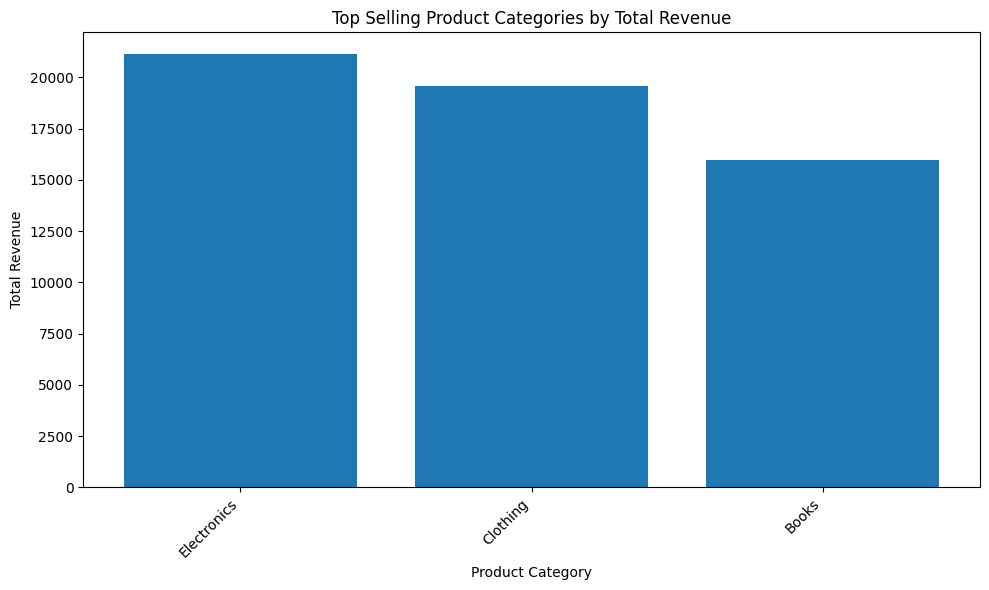

In [11]:
# Plotting the top selling product categories based on total revenue
plt.figure(figsize=(10, 6))
plt.bar(top_revenue_categories['Product Category'], top_revenue_categories['Revenue'])
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top Selling Product Categories by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

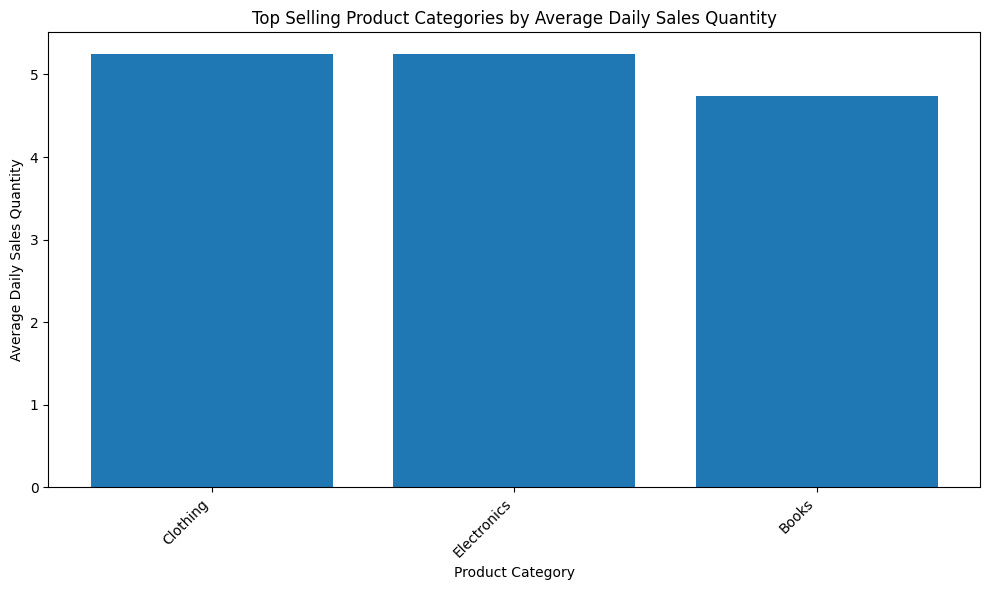

In [12]:
# Plotting the top selling product categories based on average daily sales quantity
plt.figure(figsize=(10, 6))
plt.bar(top_avg_sales_categories.index, top_avg_sales_categories.values)
plt.xlabel('Product Category')
plt.ylabel('Average Daily Sales Quantity')
plt.title('Top Selling Product Categories by Average Daily Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
